In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- since there is no missing values we do not need to fill na
- all the columns are float values and species column which is a target column is object
- since id column is useless we drop it 

In [5]:
df.drop('Id', axis=1, inplace=True)

# EDA (Exploratory Data Analysis)


In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
labels= {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica' : 2
}
df['Species'] = df['Species'].replace(labels)

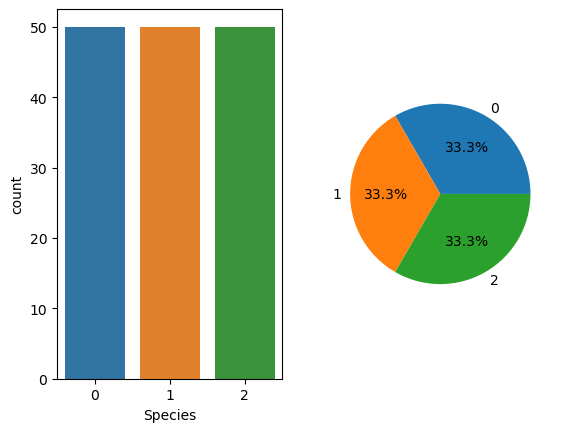

In [8]:
plt.subplot(1, 2, 1)
ax1 = sns.countplot(df, x = 'Species')
ax1 = plt.subplot(1,2,2)
plt.pie(df['Species'].value_counts(), labels=df['Species'].unique(), autopct='%1.1f%%')
plt.show()

In [9]:
df.columns
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: >

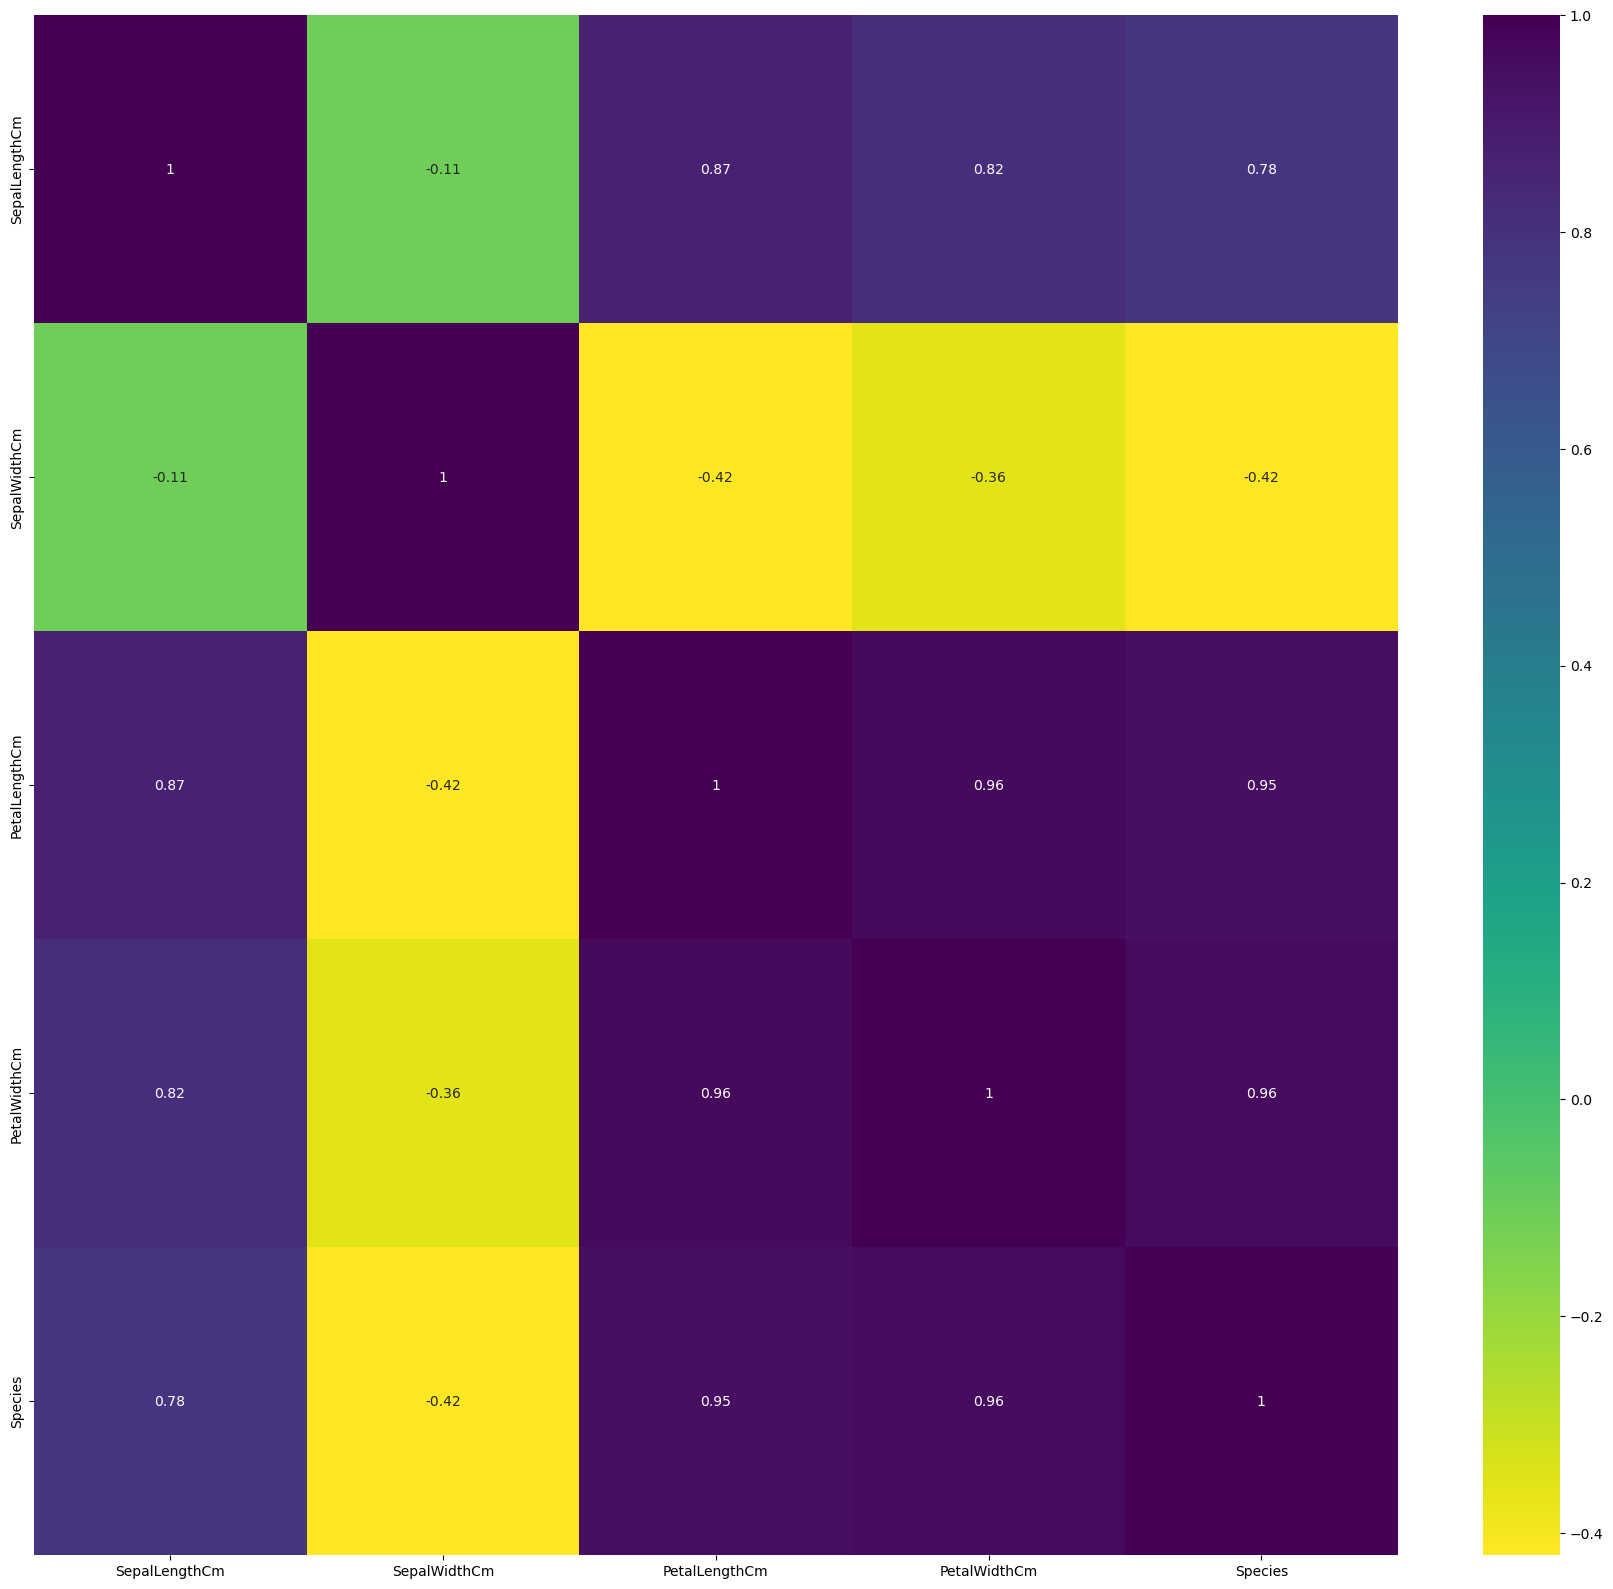

In [10]:
labels= {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica' : 2
}
df_copy = df
df_copy['Species'] = df['Species'].replace(labels)
plt.figure(figsize=(22,20))
sns.heatmap(df.corr(), cmap='viridis_r', annot=True)

- we can see that following features are not correlated with diagnosis column: 
symmetry_se, fractal_dimension_mean,fractal_dimension_se, texture_se, smoothness_se,
- remove the column having correlation less than 0.2

In [11]:

df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [12]:
df.corr()
correlation_target = df.corr().Species.sort_values(ascending=False)
correlation_target

Species          1.000000
PetalWidthCm     0.956464
PetalLengthCm    0.949043
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
Name: Species, dtype: float64

In [13]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


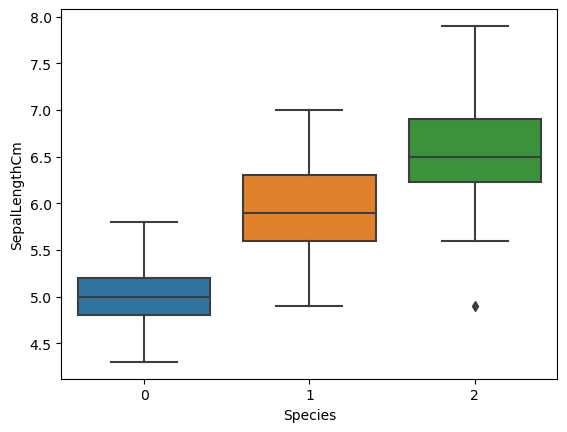

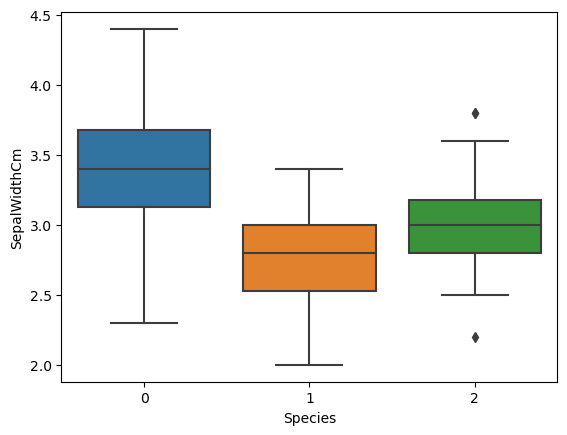

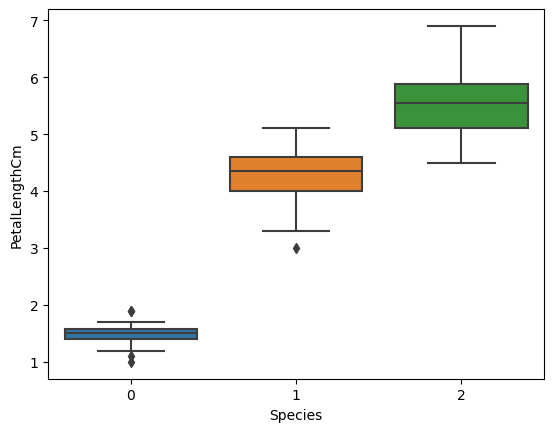

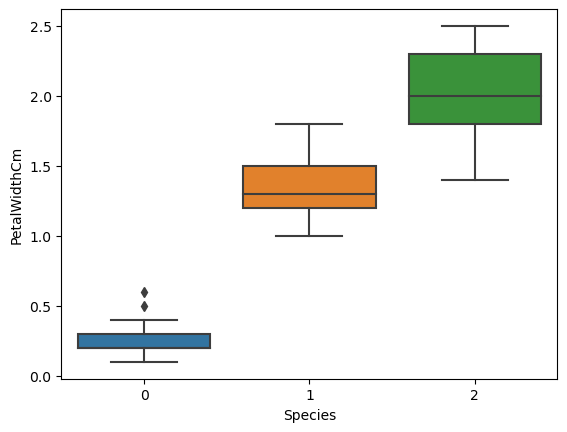

In [14]:
for index, col_names in enumerate(df.columns):
    if col_names != 'Species':
        sns.boxplot(df, x ='Species', y = col_names)
        plt.show()

In [15]:
X = df.iloc[:, :-1].values

In [18]:
y = df.iloc[:, -1]
y = y.values.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

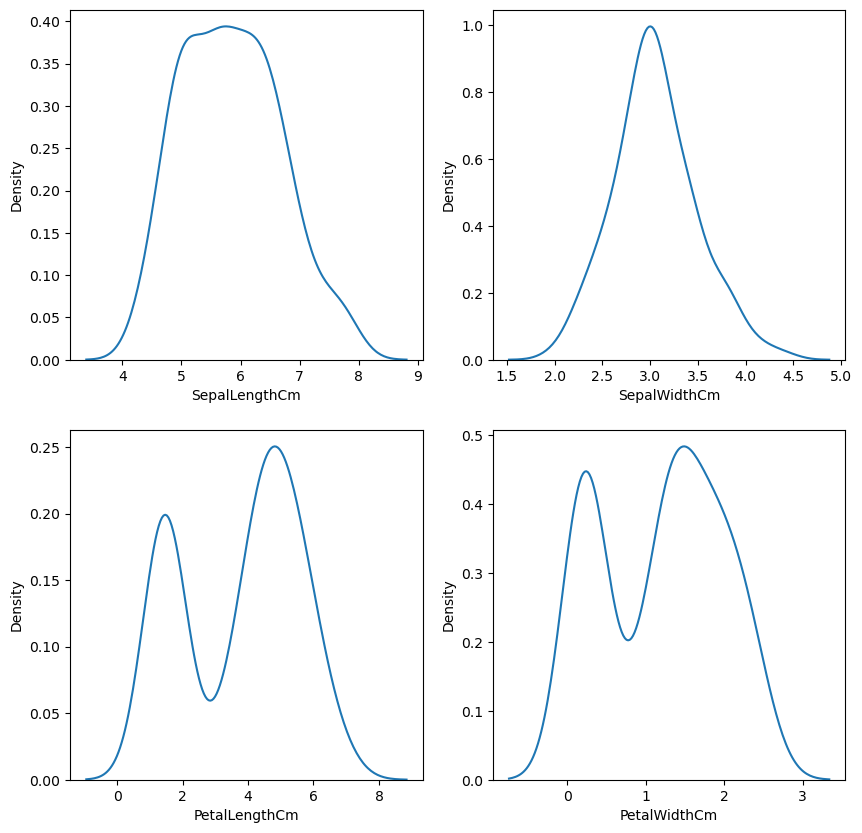

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
axes = axes.flatten()
df_plot = df.drop('Species', axis =1)
for index, col_names in enumerate(df_plot.columns):
    sns.kdeplot(data=df,x = col_names,ax= axes[index])
    
plt.show()

In [24]:
def scale(X): 
    '''find the mean of column values on each row. The formula for scaling is:
    (X - X') / Std.Deviation
    where std.deviation is the standard deviation
    and X' is the mean 
    '''  
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X

In [25]:
X = scale(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.2)

In [27]:

from DecisionTreeAjeet import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [28]:
dtc.fit(X_train, y_train)

0.008333333333333333
0.03333333333333333
0.06666666666666667
0.08333333333333333
0.125
0.175
0.24166666666666667
0.275
0.2833333333333333
0.30833333333333335
0.36666666666666664
0.4166666666666667
0.4666666666666667
0.5083333333333333
0.5333333333333333
0.5666666666666667
0.6083333333333333
0.6333333333333333
0.6916666666666667
0.7416666666666667
0.7833333333333333
0.8
0.8583333333333333
0.8833333333333333
0.9166666666666666
0.925
0.9333333333333333
0.9583333333333334
0.9916666666666667
1.0
0.016666666666666666
0.041666666666666664
0.06666666666666667
0.125
0.16666666666666666
0.21666666666666667
0.30833333333333335
0.36666666666666664
0.5583333333333333
0.65
0.7333333333333333
0.775
0.8416666666666667
0.8916666666666667
0.9166666666666666
0.9416666666666667
0.975
0.9833333333333333
0.9916666666666667
1.0
0.008333333333333333
0.016666666666666666
0.05
0.14166666666666666
0.24166666666666667
0.26666666666666666
0.275
0.2833333333333333
0.2916666666666667
0.30833333333333335
0.3166666666

In [42]:
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Test Accuracy",accuracy_score(y_test, y_pred_test))
print("Train Accuracy",accuracy_score(y_train, y_pred_train))

Test Accuracy 0.9333333333333333
Train Accuracy 0.9833333333333333


In [47]:
print(confusion_matrix(y_test, y_pred_test))
print("\n",confusion_matrix(y_train, y_pred_train))

[[15  1  0]
 [ 0  4  1]
 [ 0  0  9]]

 [[33  1  0]
 [ 0 44  1]
 [ 0  0 41]]
